# **IMAGE CLASSIFIER USING SEQUENTIAL API**

# **Setting up the environment**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full , y_train_full) , (X_test , y_test) = data
X_train , y_train = X_train_full[:-5000] , y_train_full[:-5000]
X_valid , y_valid = X_train_full[-5000:] , y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

# **Train-Test split**

In [5]:
X_train , X_valid , X_test = X_train / 255., X_valid / 255. , X_test / 255. 

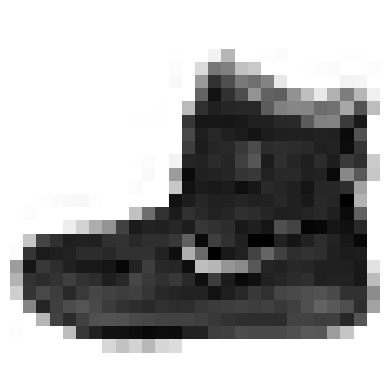

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
class_names = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Ankle boot'

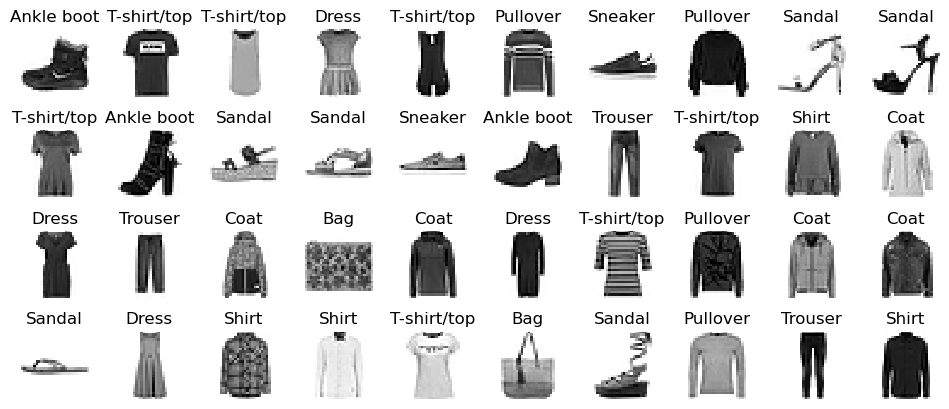

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


# **Creating the model**

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300 , activation="relu"))
model.add(tf.keras.layers.Dense(100 , activation="relu"))
model.add(tf.keras.layers.Dense(10 , activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


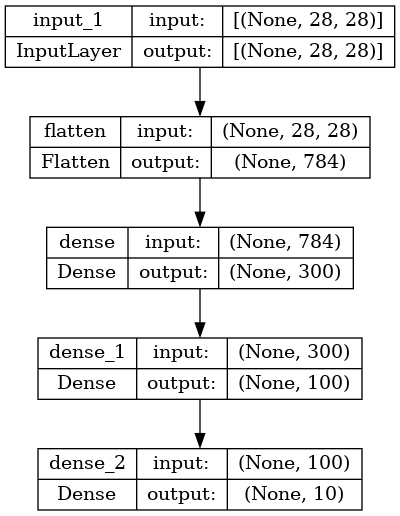

In [12]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]

In [15]:
weights , biases = hidden1.get_weights()
weights

array([[ 0.01806535,  0.05014158, -0.05498993, ...,  0.03480555,
         0.03896285, -0.0327041 ],
       [ 0.01590052,  0.01029573, -0.01758222, ...,  0.06733352,
        -0.0665015 ,  0.02176706],
       [ 0.00286477, -0.01216824,  0.06064452, ...,  0.05440851,
         0.00184101, -0.04119998],
       ...,
       [ 0.06591524, -0.01558932,  0.03168651, ...,  0.01495464,
         0.03786182,  0.02158245],
       [-0.02762266, -0.06992935, -0.02245444, ..., -0.07164516,
         0.05097684, -0.06138917],
       [-0.04602528, -0.07274519,  0.07200262, ..., -0.04706684,
        -0.02327623, -0.01330364]], dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
weights.shape

(784, 300)

In [18]:
biases.shape

(300,)

# **Compiling the model**

In [19]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="sgd" , metrics=["accuracy"])

# **Training and evaluating the model**

In [20]:
history = model.fit(X_train , y_train , epochs=30 , validation_data = (X_valid , y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 3ms/step - loss: 0.7159 - accuracy: 0.7589 - val_loss: 0.5073 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4866 - accuracy: 0.8305 - val_loss: 0.4668 - val_accuracy: 0.8314
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4401 - accuracy: 0.8441 - val_loss: 0.4255 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4151 - accuracy: 0.8548 - val_loss: 0.3960 - val_accuracy: 0.8568
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3940 - accuracy: 0.8612 - val_loss: 0.3923 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3776 - accuracy: 0.8666 - val_loss: 0.3941 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8693 - val_loss: 0.3719 - val_accuracy:

In [21]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

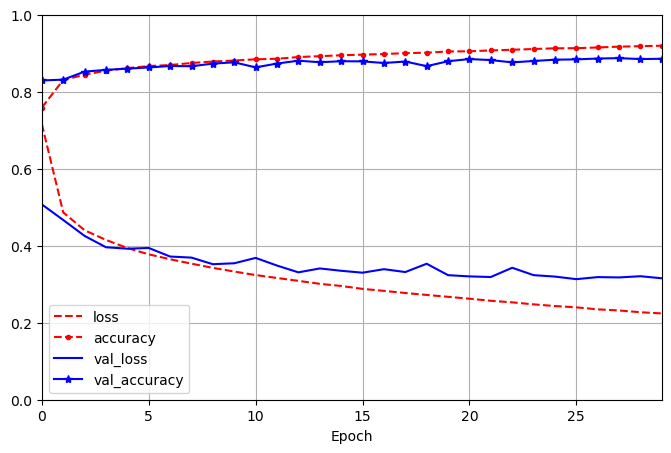

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")   # extra code
plt.show()

In [23]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8833


[0.3265148401260376, 0.8833000063896179]

# **Using the models for making predictions**

In [24]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 94ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.19, 0.  , 0.01, 0.  , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [27]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

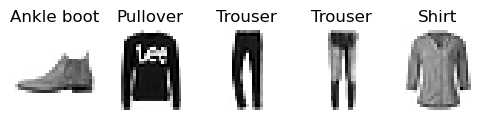

In [28]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()